In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import joblib

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = f"{0}"

## Velocity

### Load multiple timesteps

In [4]:
samples = []
for i in range(501):
    s = np.load('/home/dg321/gitTest/PRI/irp/Flow_Data/InterpolatedResult256/FpB_Interpolated_t{}_Velocity_256_256.npy'.format(i))
    samples.append(s)
    print(s.shape)

sampels_stacked = np.stack(samples)
print(sampels_stacked.shape)


(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 25

In [5]:
np.save("/home/dg321/gitTest/PRI/irp/Flow_Data/InterpolatedResult256/FpB_Interpolated_Velocity_256_256.npy", sampels_stacked)

(2, 256, 256)


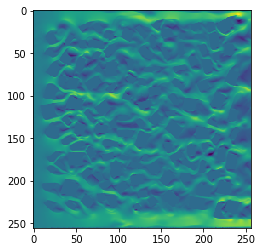

In [16]:
# X
size_start_train = 0
size_end_train = 256

data = samples[281]

print(data.shape)
plt.imshow(np.rot90(data[0,:,:],1), interpolation='none')

(2, 256, 256)


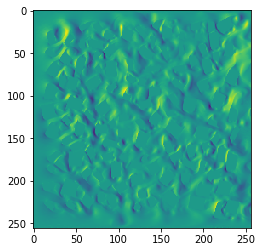

In [19]:
# Y
size_start_train = 0
size_end_train = 256

data = samples[281]

print(data.shape)
plt.imshow(np.rot90(data[1,:,:],1), interpolation='none')

In [24]:
# combine all x and y
sample_Xs = []
sample_Ys = []

for i in range(501):
    xs = np.rot90(samples[i][0,:,:], 1)
    ys = np.rot90(samples[i][1,:,:])
    sample_Xs.append(xs)
    sample_Ys.append(ys)

sampelXs_stacked = np.stack(sample_Xs)
sampelYs_stacked = np.stack(sample_Ys)
print(sampelXs_stacked.shape)
print(sampelYs_stacked.shape)

(501, 256, 256)
(501, 256, 256)


(256, 256)


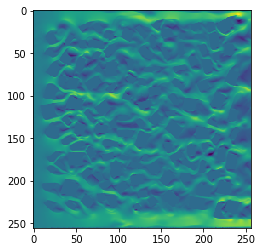

In [5]:
# X
size_start_train = 0
size_end_train = 256

data = sampelXs_stacked[281]

print(data.shape)
plt.imshow(data[:,:], interpolation='none')

In [27]:
# save 
np.save("/home/dg321/gitTest/PRI/irp/Flow_Data/InterpolatedResult256/sampelXs_stacked.npy", sampelXs_stacked)
np.save("/home/dg321/gitTest/PRI/irp/Flow_Data/InterpolatedResult256/sampelYs_stacked.npy", sampelYs_stacked)

In [3]:
# load
sampelXs_stacked = np.load("/home/dg321/gitTest/PRI/irp/Flow_Data/InterpolatedResult256/sampelXs_stacked.npy")
sampelYs_stacked = np.load("/home/dg321/gitTest/PRI/irp/Flow_Data/InterpolatedResult256/sampelYs_stacked.npy")

In [4]:
print(sampelXs_stacked.shape)

(501, 256, 256)


In [5]:
# Train and test split and normalization ... to get latent variable finally
sampleXs_train450 = sampelXs_stacked[:450]
print(sampleXs_train450.shape)

sampleYs_train450 = sampelYs_stacked[:450]
print(sampleYs_train450.shape)

(450, 256, 256)
(450, 256, 256)


In [6]:
scalerX = MinMaxScaler(feature_range=(-1, 1))

sampleXs_train450_normalized = scalerX.fit_transform(sampleXs_train450.reshape((sampleXs_train450.shape[0], sampleXs_train450.shape[1]*sampleXs_train450.shape[1])))
sampleXs_train450_normalized = sampleXs_train450_normalized.reshape((sampleXs_train450.shape[0], sampleXs_train450.shape[1], sampleXs_train450.shape[1]))

print(sampleXs_train450_normalized.shape)

(450, 256, 256)


In [7]:
# Save the scaler
scaler_filename = "/home/dg321/gitTest/PRI/irp/Flow_Data/Scalers/train450_scalerX-1_1.save"
joblib.dump(scalerX, scaler_filename)

['/home/dg321/gitTest/PRI/irp/Flow_Data/Scalers/train450_scalerX-1_1.save']

In [8]:
scalerY = MinMaxScaler(feature_range=(-1, 1))

sampleYs_train450_normalized = scalerY.fit_transform(sampleYs_train450.reshape((sampleYs_train450.shape[0], sampleYs_train450.shape[1]*sampleYs_train450.shape[1])))
sampleYs_train450_normalized = sampleYs_train450_normalized.reshape((sampleYs_train450.shape[0], sampleYs_train450.shape[1], sampleYs_train450.shape[1]))

print(sampleYs_train450_normalized.shape)

(450, 256, 256)


In [9]:
# Save the scaler
scaler_filename = "/home/dg321/gitTest/PRI/irp/Flow_Data/Scalers/train450_scalerY-1_1.save"
joblib.dump(scalerY, scaler_filename)

['/home/dg321/gitTest/PRI/irp/Flow_Data/Scalers/train450_scalerY-1_1.save']

(array([2134., 2999., 3203., 3254., 3336., 3583., 3761., 3742., 4078.,
        4056., 4069., 4055., 3782., 3448., 3197., 2885., 2613., 2429.,
        2264., 2648.]),
 array([-1.0000000e+00, -8.9999998e-01, -7.9999995e-01, -6.9999999e-01,
        -5.9999996e-01, -4.9999994e-01, -3.9999992e-01, -2.9999992e-01,
        -1.9999990e-01, -9.9999890e-02,  1.1920929e-07,  1.0000013e-01,
         2.0000014e-01,  3.0000016e-01,  4.0000015e-01,  5.0000018e-01,
         6.0000020e-01,  7.0000023e-01,  8.0000019e-01,  9.0000021e-01,
         1.0000002e+00], dtype=float32),
 <BarContainer object of 20 artists>)

<Figure size 432x288 with 0 Axes>

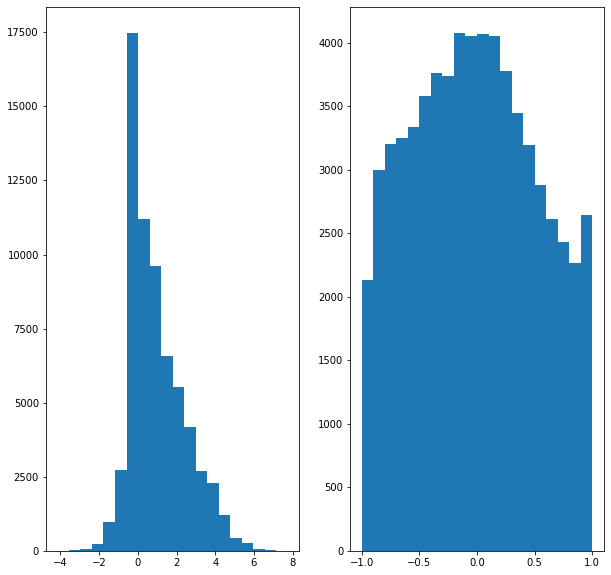

In [10]:
plt.figure()

f, axarr = plt.subplots(1,2, figsize=(10, 10))

# axarr[0].imshow(sampelXs_stacked[281], interpolation='none')
axarr[0].hist(sampelXs_stacked[281].flatten(), bins=20)


# axarr[1].imshow(sampleXs_train450_normalized[281], interpolation='none')
axarr[1].hist(sampleXs_train450_normalized[281].flatten(), bins=20)

In [27]:
# scale back
sampleXs_train450_scaleback = scalerX.inverse_transform(sampleXs_train450_normalized.reshape((sampleXs_train450.shape[0], sampleXs_train450.shape[1]*sampleXs_train450.shape[1])))
sampleXs_train450_scaleback = sampleXs_train450_scaleback.reshape((sampleXs_train450.shape[0], sampleXs_train450.shape[1], sampleXs_train450.shape[1]))

print(sampleXs_train450_scaleback.shape)

(450, 256, 256)


(array([8.0000e+00, 1.1000e+01, 4.5000e+01, 2.3000e+02, 9.7900e+02,
        2.7340e+03, 1.7474e+04, 1.1199e+04, 9.6170e+03, 6.5840e+03,
        5.5270e+03, 4.1770e+03, 2.7060e+03, 2.2900e+03, 1.2050e+03,
        4.1900e+02, 2.6200e+02, 4.5000e+01, 1.6000e+01, 8.0000e+00]),
 array([-4.1609664 , -3.5649111 , -2.9688559 , -2.3728004 , -1.7767451 ,
        -1.1806898 , -0.5846345 ,  0.01142082,  0.6074761 ,  1.2035315 ,
         1.7995868 ,  2.395642  ,  2.9916973 ,  3.5877528 ,  4.183808  ,
         4.7798634 ,  5.375919  ,  5.971974  ,  6.5680294 ,  7.1640844 ,
         7.76014   ], dtype=float32),
 <BarContainer object of 20 artists>)

<Figure size 432x288 with 0 Axes>

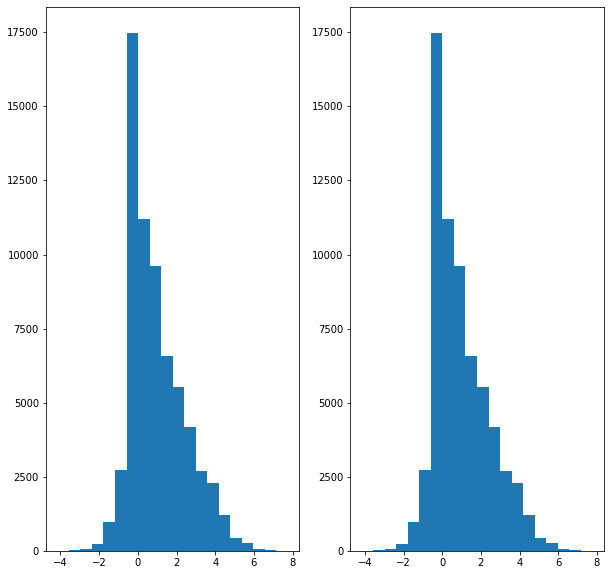

In [28]:
plt.figure()

f, axarr = plt.subplots(1,2, figsize=(10, 10))

# axarr[0].imshow(sampelXs_stacked[281], interpolation='none')
axarr[0].hist(sampelXs_stacked[281].flatten(), bins=20)


# axarr[1].imshow(sampleXs_train450_normalized[281], interpolation='none')
axarr[1].hist(sampleXs_train450_scaleback[281].flatten(), bins=20)

<Figure size 432x288 with 0 Axes>

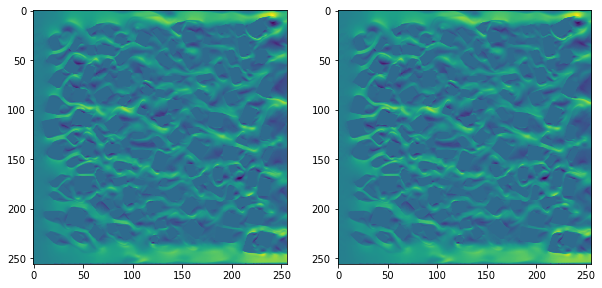

In [31]:
plt.figure()

f, axarr = plt.subplots(1,2, figsize=(10, 10))

axarr[0].imshow(sampelXs_stacked[281], interpolation='none')
# axarr[0].hist(sampelXs_stacked[281].flatten(), bins=20)


axarr[1].imshow(sampleXs_train450_scaleback[281], interpolation='none')
# axarr[1].hist(sampleXs_train450_scaleback[281].flatten(), bins=20)

In [11]:
np.save("/home/dg321/gitTest/PRI/irp/Flow_Data/InterpolatedResult256/sampleXs_train450_normalized-1_1.npy", sampleXs_train450_normalized)
np.save("/home/dg321/gitTest/PRI/irp/Flow_Data/InterpolatedResult256/sampleYs_train450_normalized-1_1.npy", sampleYs_train450_normalized)

### Test

In [23]:
sampleXs_test = sampelXs_stacked[450:]
print(sampleXs_test.shape)
sampleYs_test = sampelYs_stacked[450:]
print(sampleYs_test.shape)

(51, 256, 256)
(51, 256, 256)


In [24]:
sampleXs_test_normalized = scalerX.transform(sampleXs_test.reshape((sampleXs_test.shape[0], sampleXs_test.shape[1]*sampleXs_test.shape[1])))
sampleXs_test_normalized = sampleXs_test_normalized.reshape((sampleXs_test.shape[0], sampleXs_test.shape[1], sampleXs_test.shape[1]))

print(sampleXs_test_normalized.shape)

(51, 256, 256)


In [25]:
sampleYs_test_normalized = scalerY.transform(sampleYs_test.reshape((sampleYs_test.shape[0], sampleYs_test.shape[1]*sampleYs_test.shape[1])))
sampleYs_test_normalized = sampleYs_test_normalized.reshape((sampleYs_test.shape[0], sampleYs_test.shape[1], sampleYs_test.shape[1]))

print(sampleYs_test_normalized.shape)

(51, 256, 256)


In [26]:
np.save("/home/dg321/gitTest/PRI/irp/Flow_Data/InterpolatedResult256/sampleXs_test_normalized.npy", sampleXs_test_normalized)
np.save("/home/dg321/gitTest/PRI/irp/Flow_Data/InterpolatedResult256/sampleYs_test_normalized.npy", sampleYs_test_normalized)

<Figure size 432x288 with 0 Axes>

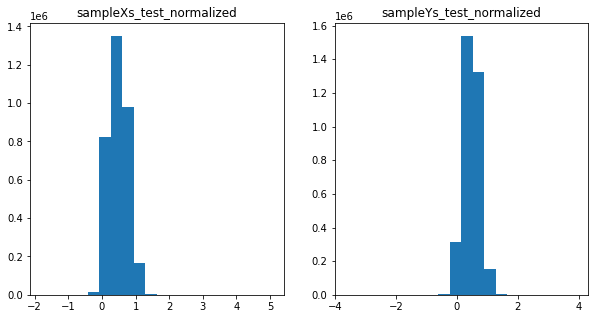

In [27]:
plt.figure()

f, axarr = plt.subplots(1,2, figsize=(10, 5))

axarr[0].hist(sampleXs_test_normalized.flatten(), bins=20)
axarr[0].title.set_text('sampleXs_test_normalized')

axarr[1].hist(sampleYs_test_normalized.flatten(), bins=20)
axarr[1].title.set_text('sampleYs_test_normalized')

In [28]:
# Add a new axis for the channel
sampleXs_test_normalized = np.expand_dims(sampleXs_test_normalized, axis=-1)
sampleYs_test_normalized = np.expand_dims(sampleYs_test_normalized, axis=-1)

# Concatenate
concatenated_data_test51 = np.concatenate((sampleXs_test_normalized, sampleYs_test_normalized), axis=-1)

print(concatenated_data_test51.shape)

(51, 256, 256, 2)


<Figure size 432x288 with 0 Axes>

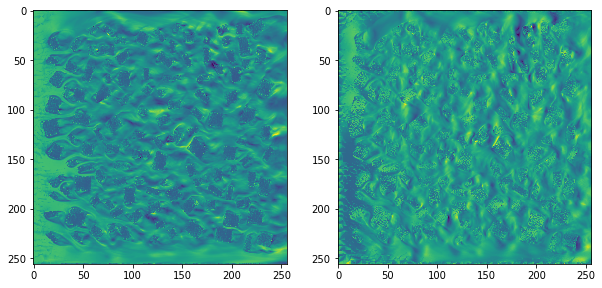

In [30]:
plt.figure()

f, axarr = plt.subplots(1,2, figsize=(10, 10))

axarr[0].imshow(concatenated_data_test51[30][:,:,0], interpolation='none')

axarr[1].imshow(concatenated_data_test51[30][:,:,1], interpolation='none')

<Figure size 432x288 with 0 Axes>

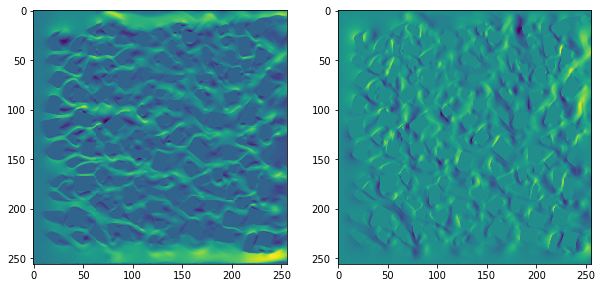

In [32]:
plt.figure()

f, axarr = plt.subplots(1,2, figsize=(10, 10))

axarr[0].imshow(sampleXs_test[30][:,:], interpolation='none')

axarr[1].imshow(sampleYs_test[30][:,:], interpolation='none')

In [33]:
np.save("/home/dg321/gitTest/PRI/irp/Flow_Data/InterpolatedResult256/concatenated_data_test51.npy", concatenated_data_test51)

In [ ]:
# Add a new axis for the channel
sampleXs_train450_normalized = np.expand_dims(sampleXs_train450_normalized, axis=-1)
sampleYs_train450_normalized = np.expand_dims(sampleYs_train450_normalized, axis=-1)

# Concatenate
concatenated_data_train450 = np.concatenate((sampleXs_train450_normalized, sampleYs_train450_normalized), axis=-1)

print(concatenated_data_train450.shape)

np.save("/home/dg321/gittrain450/PRI/irp/Flow_Data/"+ foldername + "/concatenated_data_train450.npy", concatenated_data_train450)

## Building

In [35]:
building = np.load("/home/dg321/gitTest/PRI/irp/Flow_Data/InterpolatedResult256/FpB_Interpolated_t0_VelocityAbsorption_256_256.npy")

(2, 256, 256)


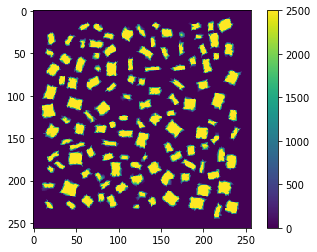

In [42]:
size_start_train = 0
size_end_train = 256

print(building.shape)
plt.imshow(np.rot90(building[0,:,:],1), interpolation='none')
plt.colorbar()

(2, 256, 256)


(array([49509.,  1225.,  1009.,   916.,   850.,   899.,   847.,   855.,
          890.,  8536.]),
 array([   0.     ,  250.00005,  500.0001 ,  750.0001 , 1000.0002 ,
        1250.0002 , 1500.0002 , 1750.0004 , 2000.0004 , 2250.0005 ,
        2500.0005 ], dtype=float32),
 <BarContainer object of 10 artists>)

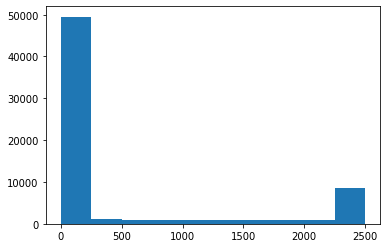

In [41]:
size_start_train = 0
size_end_train = 256

print(building.shape)
plt.hist(np.rot90(building[1,:,:],1).flatten())

In [43]:
building_replacevalue = building.copy()

In [56]:
building_replacevalue[building>1500] = 1
building_replacevalue[building<=1500] = 0

(2, 256, 256)


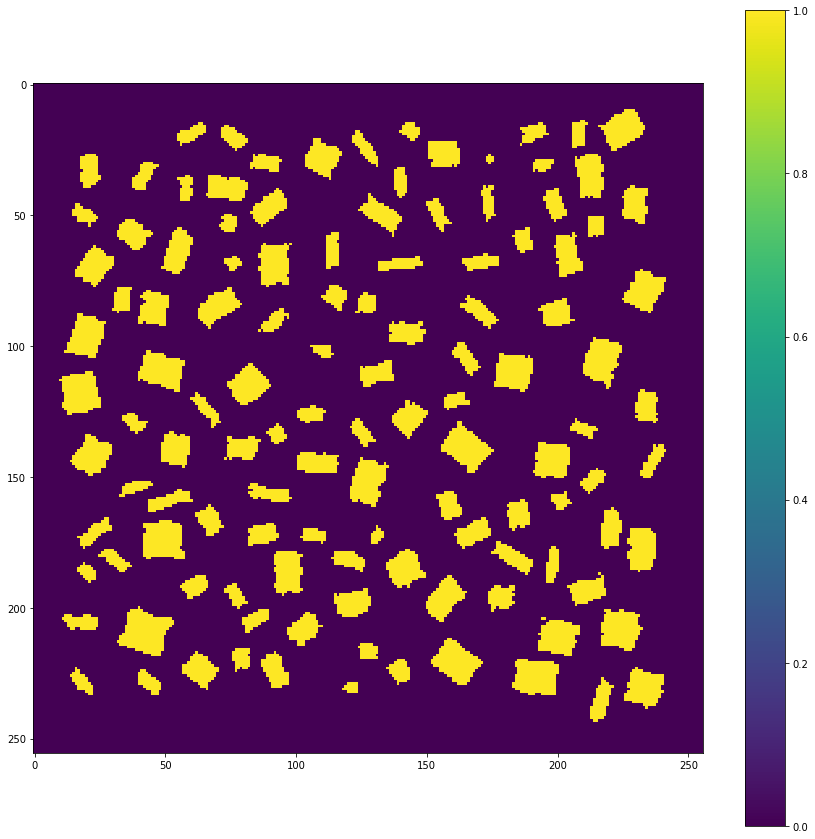

In [62]:
size_start_train = 0
size_end_train = 256

print(building.shape)
plt.figure(figsize=(15, 15)) 
plt.imshow(np.rot90(building_replacevalue[0,:,:],1), interpolation='none')
plt.colorbar()

after interpolation, the shape got curve